In [91]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [106]:
pd.set_option('display.max_columns', 300)
df = pd.read_csv('/content/drive/MyDrive/df_done.csv')
df = df[df['s_teukbyul_si/do'] == '부산광역시']
df

,s_date,e_date,s_lat,s_lng,e_lat,e_lng,max_rpm,s20,s30,s40,s50,s60,s70,s80,s90,s100,s110,s120,s130,s140,s150,start_gps,end_gps,distance,airport_start,airport_end,start_add,end_add,s_teukbyul_si/do,s_teukbyulsi/goon/gu,s_dong/eup/myun,e_teukbyulsi/do,e_teukbyulsi/goon/gu,e_dong/eup/myun,road_list,fee,s_Datetime,e_Datetime,s_hour,day_or_night,road_1,road_2,road_3,path,duration(min),root_dist(km)
220,2021-12-30 6:00,2021-12-30 6:00,35.171490,128.949323,35.205108,129.068820,0.040000,120,61,180,121,240,121,0,0,0,0,0,0,0,0,"35.17149, 128.9493233","35.2051083, 129.06882",11.484719,True,False,부산광역시 강서구 대저2동 2779-7,부산광역시 동래구 온천3동 1412-7,부산광역시,강서구,대저2동,부산광역시,동래구,온천3동,원활 공항로 3.2km 서행 남해고속도로 5.5km 서행 만덕대로 3km,20270,2021-12-30 06:00:00,2021-12-30 06:00:00,6,1,공항로,남해고속도로,만덕대로,"공항로,남해고속도로,만덕대로",28,16.000
256,2022-05-23 6:00,2022-05-23 6:00,35.177090,128.950522,35.176553,128.951015,1021.680000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"35.17709, 128.9505216","35.1765533, 128.9510149",0.074644,True,True,부산광역시 강서구 대저2동 2160,부산광역시 강서구 대저2동 2401-2,부산광역시,강서구,대저2동,부산광역시,강서구,대저2동,서행 공항진입로 332m 미확인 공항앞길 304m,3800,2022-05-23 06:00:00,2022-05-23 06:00:00,6,1,공항진입로,공항앞길,-,"공항진입로,공항앞길,-",1,0.704
257,2022-05-23 7:00,2022-05-23 7:00,35.176773,128.950997,35.176627,128.950797,1352.800000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"35.1767733, 128.9509966","35.1766266, 128.9507966",0.024424,True,True,부산광역시 강서구 대저2동 2401-2,부산광역시 강서구 대저2동 2401-5,부산광역시,강서구,대저2동,부산광역시,강서구,대저2동,NaN,3800,2022-05-23 07:00:00,2022-05-23 07:00:00,7,1,-,-,-,"-,-,-",1,0.054
258,2022-05-30 6:00,2022-05-30 7:00,35.176815,128.950878,35.177655,128.950687,2484.360000,3,3,0,0,0,0,0,0,0,0,0,0,0,0,"35.176815, 128.9508783","35.1776549, 128.9506866",0.095004,True,True,부산광역시 강서구 대저2동 2162-2,부산광역시 강서구 대저2동 2157,부산광역시,강서구,대저2동,부산광역시,강서구,대저2동,미확인 공항앞길 51m,3800,2022-05-30 06:00:00,2022-05-30 07:00:00,6,1,공항앞길,-,-,"공항앞길,-,-",1,0.118
259,2022-06-12 23:00,2022-06-13 0:00,35.176638,128.950898,34.915143,128.618073,4351.280000,102,200,317,569,1051,1067,349,81,11,0,0,0,0,0,"35.1766383, 128.9508983","34.9151433, 128.6180733",41.993615,True,False,부산광역시 강서구 대저2동 2401-2,경상남도 거제시 연초면 오비리 957-20,부산광역시,강서구,대저2동,경상남도,거제시,연초면,서행 남해제2고속도로지선 6.8km 원활 가락대로 11km 원활 거가대로 33km,78190,2022-06-12 23:00:00,2022-06-13 00:00:00,23,1,남해제2고속도로지선,가락대로,거가대로,"남해제2고속도로지선,가락대로,거가대로",68,62.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15485,2022-01-07 0:00,2022-01-07 1:00,35.176950,128.950843,35.176718,128.950958,901.130000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"35.17695, 128.9508433","35.1767183, 128.9509583",0.027803,True,True,부산광역시 강서구 대저2동 2162-2,부산광역시 강서구 대저2동 2401-2,부산광역시,강서구,대저2동,부산광역시,강서구,대저2동,미확인 공항앞길 15m,4550,2022-01-07 00:00:00,2022-01-07 01:00:00,0,0,공항앞길,-,-,"공항앞길,-,-",1,0.025
15486,2022-01-08 2:00,2022-01-08 2:00,35.176622,128.950603,35.225837,128.885267,2181.600000,242,485,419,137,0,0,0,0,0,0,0,0,0,0,"35.1766216, 128.9506033","35.2258366, 128.8852666",8.074064,True,False,부산광역시 강서구 대저2동 2162-6,경상남도 김해시 부원동 308-2,부산광역시,강서구,대저2동,경상남도,김해시,부원동,미확인 공항로 2.9km 원활 낙동북로 4.3km 원활 김해대로 4.4km,20750,2022-01-08 02:00:00,2022-01-08 02:00:00,2,0,공항로,낙동북로,김해대로,"공항로,낙동북로,김해대로",17,14.000
15487,2022-01-11 2:00,2022-01-11 2:00,35.176665,128.950713,35.176667,128.950685,1518.720000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"35.176665, 128.9507133","35.1766666, 128.950685",0.002578,True,True,부산광역시 강서구 대저2동 2401-5,부산광역시 강서구 대저2동 2162-6,부산광역시,강서구,대저2동,부산광역시,강서구,대저2동,NaN,4550,2022-01-11 02:00:00,2022-01-11 02:00:00,2,0,-,-,-,"-,-,-",1,0.003
15488,2022-01-12 3:00,2022-01-12 3:00,35.176910,128.950972,35.116442,129.041988,3574.320000,158,280,319,147,155,45,28,10,0,0,0,0,0,0,"35.1769099, 128.9509716","35.1164416, 129.0419883",10.662626,True,False,부산광역시 강서구 대저2동 2162-5,부산광역시 동구 초량동 1201-1,부산광역시,강서구,대저2동,부산광역시,동구,초량동,서행 남해제2고속도로지선 2.8km 원활 학감대로 2km 원활 보수대로 3.6km,20410,2022-01-12 03:00:00,2022-01-12 03:00:00,3,0,남해제2고속도로지선,학감대로,보수대로,"남해제2고속도로지선,학감대로,보수대로",21,15.000

In [ ]:
a = list(df_short.road_1.unique())
b = list(df_short.road_2.unique())
c = list(df_short.road_3.unique())

In [ ]:
 k = list(set(a+b+c))
 
 k.to_csv('/content/drive/MyDrive/팔당댐/k.csv')

AttributeError: ignored

In [ ]:
k[120:]

##1차 클러스터링(지역 및 비슷한 운행으로 군집)

###지역 원핫인코딩(부산으로만 필터링하면 안해도 될듯)

In [ ]:
#df = pd.get_dummies(data = df, columns = ['s_teukbyul_si/do'], prefix = 's_teukbyul_si/do')

###정규화

In [96]:
from sklearn.preprocessing import MinMaxScaler

# 두 가지 feature를 대상
data = df[['duration(min)', 'root_dist(km)']]

# 정규화 진행
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data)

##모델링

In [97]:
from sklearn.cluster import KMeans

k = 5

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(data_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
df['cluster'] = model.fit_predict(data_scale)

In [98]:
##단거리 중거리 장거리 3 군집으로 나누기. 
df.cluster.value_counts()

0    10823
4     1806
1     1109
2      250
3        2
Name: cluster, dtype: int64

In [ ]:
df[df.cluster == 1]

In [ ]:
k_df[k_df['clusters']==0].describe()

##최적의 k 찾기(엘보우 기법)

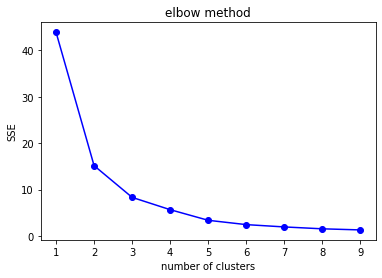

In [ ]:
# 엘보우 기법 (오차제곱합의 값이 최소가 되도록 결정하는 방법)
def elbow(data, length):
    sse = [] # sum of squre error 오차제곱합
    for i in range(1, length):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(data)
        # SSE 값 저장
        sse.append(kmeans.inertia_)
    plt.plot(range(1, length), sse, 'bo-')
    plt.title("elbow method")
    plt.xlabel("number of clusters")
    plt.ylabel("SSE")
    plt.show()
elbow(data_scale, 10)

###클러스터링 시각화

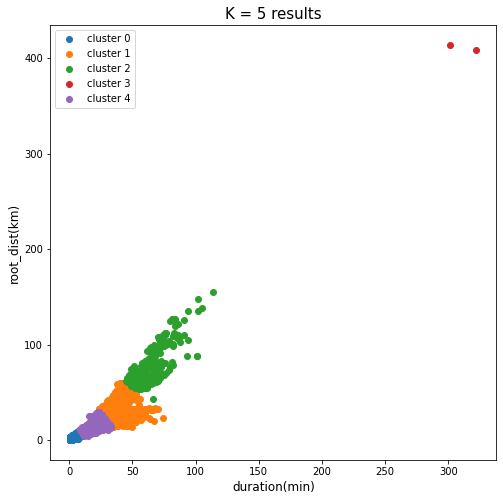

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(df.loc[df['cluster'] == i, 'duration(min)'], df.loc[df['cluster'] == i, 'root_dist(km)'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('duration(min)', size = 12)
plt.ylabel('root_dist(km)', size = 12)
plt.show()

In [100]:
df_short = df[df.cluster == 0]
df_mid= df[df.cluster == 4]
df_long = df[df.cluster == 1]

###folium을 통해 경로 시각화

In [ ]:
import folium
center = [36.6,126.99]
m= folium.Map(location = center, zoom_start = 12)

In [ ]:

df_mid['s'] = df_mid[['s_lat','s_lng']].values[:].tolist()
df_mid['e'] = df_mid[['e_lat','e_lng']].values[:].tolist()


for i in range(len(df_mid)):
  line = df_mid[['s','e']].values[i].tolist()
  folium.PolyLine(locations = line, tooltip = 'Polyline').add_to(m)

m

##2차 클러스터링(성향을 기준으로 클러스터링)

##속도 파생변수 생성

In [ ]:
df_short

In [ ]:
##속도구간이 30 40 50 정도라고 생각.
df_short['time_sum'] = df_short['s20'] + df_short['s30'] + df_short['s40'] + df_short['s50']+ df_short['s60']+df_short['s70']+df_short['s80']+df_short['s90']+df_short['s100']+df_short['s110']+df_short['s120']+df_short['s130']+df_short['s140']+df_short['s150']
df_short['fasttime_sum'] = df_short['s60']+df_short['s70']+df_short['s80']+df_short['s90']+df_short['s100']+df_short['s110']+df_short['s120']+df_short['s130']+df_short['s140']+df_short['s150']
df_short['ratio'] = df_short['fasttime_sum']/df_short['time_sum']

In [ ]:
df_short.time_sum.drop(0, axis = 1)

###파생변수 생성후 다시 2차 클러스터링 진행

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#feature를 대상
data = df0[['max_rpm', 'root_dist(km)']]

# 정규화 진행
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data)

In [ ]:
from sklearn.cluster import KMeans

k = 5

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(data_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
df['cluster'] = model.fit_predict(data_scale)

In [ ]:
# 엘보우 기법 (오차제곱합의 값이 최소가 되도록 결정하는 방법)
def elbow(data, length):
    sse = [] # sum of squre error 오차제곱합
    for i in range(1, length):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(data)
        # SSE 값 저장
        sse.append(kmeans.inertia_)
    plt.plot(range(1, length), sse, 'bo-')
    plt.title("elbow method")
    plt.xlabel("number of clusters")
    plt.ylabel("SSE")
    plt.show()
elbow(data_scale, 10)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(df.loc[df['cluster'] == i, 'duration(min)'], df.loc[df['cluster'] == i, 'root_dist(km)'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('duration(min)', size = 12)
plt.ylabel('root_dist(km)', size = 12)
plt.show()